# ***Project 5 Machine Learning Algorithms***

### ***Task 1. Configuration of Neural Networks***

**1.1 Use the first 2,000 points to train your neural network using an automatic grid search tool. Use
the remaining 300 points as test data.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
df = pd.read_csv('SaYoPillow_Dataset.csv', usecols  = ['number_of_hours_of_sleep','snoring_range', 'heart_rate','oxygen_in_blood','rapid_eye_movement','stress_level'])
df.head()

,snoring_range,oxygen_in_blood,rapid_eye_movement,number_of_hours_of_sleep,heart_rate,stress_level
0,45.040,95.016,60.16,7.016,50.04,0.0
1,72.800,91.280,91.40,3.920,63.20,2.0
2,98.848,86.272,103.56,0.000,82.12,4.0
3,62.240,90.224,86.12,2.336,60.56,2.0
4,96.192,82.288,100.24,0.000,75.48,4.0


In [4]:
X = df.iloc[:,:-1]
Y = df['snoring_range']

X_train, X_test,  y_train, y_test = train_test_split(X, Y, train_size=2000, test_size=300, random_state=42)

In [5]:
mlp = MLPRegressor(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative mean squared error):", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best score (negative mean squared error): -0.004262047169931527


In [6]:
X_train_const = sm.add_constant(X_train)  # adding a constant for the intercept
model = sm.OLS(y_train, X_train_const)    # creating the OLS model
results = model.fit()                     # fitting the model

print(results.summary())

y_train_pred = results.predict(X_train_const)

sse = ((y_train - y_train_pred) ** 2).sum()
print(f"Sum of Squared Errors (SSE): {sse}")


                            OLS Regression Results                            
Dep. Variable:          snoring_range   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.215e+29
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:26:32   Log-Likelihood:                 53461.
No. Observations:                2000   AIC:                        -1.069e+05
Df Residuals:                    1994   BIC:                        -1.069e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### ***1.3 Discuss your results.***

To provide a meaningful discussion of the results from tasks 1.1 and 1.2, let's consider the output from both the neural network grid search and the linear regression model:

### 1. Neural Network Grid Search Results
We have run the grid search for the `MLPRegressor` as described, I have identified the best hyperparameters for your neural network. Below are few observations:

### Hyperparameter Efficacy
The best parameters obtained from the `GridSearchCV` for the MLPRegressor demonstrate the model's optimal settings for this specific dataset. The `hidden_layer_sizes` of (50, 50) indicate a preference for a moderately complex model. The `activation` function `relu` is often preferred for many practical applications due to its ability to provide non-linear transformation with less risk of vanishing gradients compared to other activation functions like `tanh`. The `solver` 'adam' is known for being robust and efficient in handling large datasets and non-convex optimization problems, making it suitable for training deep neural networks. The `alpha` value of 0.001 helps in controlling overfitting by adding just enough regularization to the model, which improves its generalization capabilities without being overly punitive. Lastly, the `learning_rate_init` of 0.001 is conservative enough to allow for convergence to a good solution without the training process missing the global minimum.

### Performance Evaluation
The best score obtained, which is a negative mean squared error (MSE) of -0.004262047169931527, highlights the model's predictive accuracy. This MSE, when converted to a positive value, provides a measure of the average squared difference between the predicted and actual values. The closer this value is to zero, the better the model's predictions are. 

### 2. Linear Regression Model Results
From the re-run of multiple regression model:

### Model Fit
The regression results show an extraordinarily high R-squared value of 1.000, indicating that the model explains all the variability in the dependent variable (`snoring_range`) with the independent variables included in the model. This suggest that the model fits the data exceptionally well. However, such perfect statistics may also indicate potential issues such as data leakage, perfect multicollinearity, or an error in data handling or model specification.

### SSE Value
Regarding the Sum of Squared Errors (SSE), while not explicitly provided in this output, the implication of a perfect fit (R-squared = 1.000) is that the SSE would be zero or extremely close to zero. This would normally suggest no discrepancy between the predicted and observed values, indicating an optimal fit. However, given the context of an R-squared of 1.000 and the nature of the other statistics, it would be prudent to scrutinize the data and model more closely to ensure there are no underlying issues skewing these results.

### ***Task 2. Generation of Parameter Sets for HMM***

**Step 1: Generation of the pij probabilities**
- Draw a pseudo-random number r and set p11 = r. Repeat the same for the remaining probabilities
on the same row, i.e., p12; p13, and p14. Normalize the resulting probabilities, by dividing each by the
sum p11 + p12 + p13 + p14, so that they all add up to 1.That is, set p11 = p11=(p11 + p12 + p13 + p14),
p12=(p12 + p12 + p13 + p14), p13=(p11 + p12 + p13 + p14), and p14 = p14=(p11 + p12 + p13 + p14).

- Repeat the same for the remaining rows of P.

In [7]:
np.random.seed(200537799)

# Step 1: Generate the one-step transition probabilities matrix P
P = np.zeros((4, 4))

for i in range(4):
    random_numbers = np.random.rand(4)
    P[i, :] = random_numbers / random_numbers.sum()

print('P:', P)

P: [[0.29626407 0.30823233 0.37067493 0.02482867]
 [0.28639575 0.19509174 0.38426513 0.13424739]
 [0.19700037 0.44275299 0.25230887 0.10793777]
 [0.2527676  0.24369366 0.19153504 0.3120037 ]]


**Step 2: Generation of the bi(k) probabilities**
- Draw a pseudo-random number r and set b1(1) = r. Repeat the same for the remaining probabilities
on the same row, i.e., b1(2); b1(3). Normalize the resulting probabilities, by dividing each by the sum
b1(1)+b1(2)+b1(3). That is, set b1(1) = b1(1)=(b1(1)+b1(2)+b1(3)), b1(2) = b1(1)=(b1(1)+b1(2)+
b1(3)), b1(3) = b1(3)=(b1(1) + b1(2) + b1(3)),

- Repeat the same for the remaining rows of B.

In [8]:
# Step 2: Generate the event matrix B
B = np.zeros((4, 3))

for i in range(4):
    row_sum = 0
    for j in range(3):
      B[i][j] = np.random.rand(1)
      row_sum += B[i][j]
    B[i, :] = B[i, :] / row_sum

print(B)


[[0.3038072  0.31608018 0.38011262]
 [0.03685936 0.57289004 0.3902506 ]
 [0.57051371 0.19931544 0.23017085]
 [0.55137385 0.31420795 0.1344182 ]]


C:\Users\nayan\AppData\Local\Temp\ipykernel_39660\1964147934.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B[i][j] = np.random.rand(1)


**Step 3: Generation of the sequence of observation O.**

at t = 1

In [9]:
pi = [1, 0, 0, 0]

q1 = 0  # 0-based indexing for the first state

B = np.array([
    [0.8, 0.1, 0.1],
    [0.3, 0.4, 0.3],
    [0.1, 0.2, 0.7],
    [0.2, 0.5, 0.3]
])

r = np.random.rand()

if r <= 0.8:
    O1 = 1
elif r <= 0.9:
    O1 = 2
else:
    O1 = 3

O1


1

for t = 2

In [10]:
# Set the random seed for reproducibility
np.random.seed(200537799 + 1)  # incrementing seed to simulate the passage of time

r = np.random.rand()

if r <= 0.4:
    q2 = 1
elif r <= 0.8:
    q2 = 2
elif r <= 0.9:
    q2 = 3
else:
    q2 = 4

q2 -= 1
print(q2)
r = np.random.rand()

if r <= B[q2, 0]:
    O2 = 1
elif r <= B[q2, 0] + B[q2, 1]:
    O2 = 2
else:
    O2 = 3

O2


1


2

at t =3

In [11]:
q2 = 1  # your q2 value here, 0-based index

np.random.seed(200537799 + 2)  # incrementing seed to simulate the passage of time

# Step 1: Determine q3 based on the transition probabilities from q2
r = np.random.rand()
probabilities = P[q2]  # transition probabilities from the current state
cumulative_probabilities = np.cumsum(probabilities)
q3 = np.where(cumulative_probabilities >= r)[0][0]

# Step 2: Determine O3 based on the event matrix B for the new state q3
r = np.random.rand()
probabilities = B[q3]  # event probabilities from the current state
cumulative_probabilities = np.cumsum(probabilities)
O3 = np.where(cumulative_probabilities >= r)[0][0] + 1  # +1 for 1-based indexing of observations

print("State q3:", q3 + 1)  # +1 for 1-based indexing of states
print("Observation O3:", O3)


State q3: 1
Observation O3: 1


at t = 4

In [12]:
P = np.array([
    [0.4, 0.4, 0.1, 0.1],
    [0.2, 0.3, 0.3, 0.2],
    [0.1, 0.1, 0.4, 0.4],
    [0.4, 0.3, 0.2, 0.1]
])

B = np.array([
    [0.8, 0.1, 0.1],
    [0.3, 0.4, 0.3],
    [0.1, 0.2, 0.7],
    [0.2, 0.5, 0.3]
])

np.random.seed(200537799)

observations_final = [1, 2, 1]  # O1, O2, O3 are all 1 based on the previous steps
states = [1, 2, 1]  # q1=1, q2=2, q3=1 based on the previous steps

# Continue the process until we have 1000 observations
for t in range(3, 1000):
    np.random.seed(200537799 + t)
    current_state = states[-1] - 1  # Convert to 0-based indexing
    r = np.random.rand()
    probabilities = P[current_state]
    cumulative_probabilities = np.cumsum(probabilities)
    next_state = np.where(cumulative_probabilities >= r)[0][0]
    
    r = np.random.rand()
    probabilities = B[next_state]
    cumulative_probabilities = np.cumsum(probabilities)
    next_observation = np.where(cumulative_probabilities >= r)[0][0] + 1  # Convert back to 1-based indexing

    states.append(next_state + 1)  # Convert back to 1-based indexing
    observations_final.append(next_observation)

print("Final state sequence:", states)
print("Final observation sequence:", observations_final)
# print(observations)


Final state sequence: [1, 2, 1, 3, 3, 4, 2, 4, 1, 1, 4, 2, 3, 3, 3, 3, 3, 2, 1, 2, 4, 3, 1, 2, 2, 2, 2, 1, 2, 4, 2, 4, 4, 1, 2, 2, 2, 3, 3, 3, 1, 1, 2, 3, 4, 1, 4, 3, 3, 3, 4, 1, 4, 1, 3, 4, 2, 3, 4, 1, 1, 2, 2, 3, 4, 1, 1, 4, 1, 1, 2, 4, 2, 2, 3, 3, 4, 3, 4, 1, 4, 2, 4, 2, 1, 2, 2, 3, 4, 1, 1, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 4, 1, 3, 4, 1, 2, 1, 1, 1, 2, 3, 4, 1, 4, 3, 3, 3, 4, 2, 4, 2, 2, 4, 3, 4, 3, 4, 4, 3, 4, 2, 4, 1, 2, 4, 3, 3, 4, 1, 1, 3, 2, 1, 1, 2, 1, 2, 4, 1, 2, 4, 2, 1, 1, 2, 2, 3, 3, 4, 1, 2, 2, 1, 3, 3, 4, 3, 3, 1, 2, 4, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3, 4, 1, 1, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 2, 4, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 3, 3, 4, 1, 2, 3, 1, 2, 1, 2, 4, 1, 2, 4, 1, 3, 4, 2, 1, 2, 3, 3, 3, 4, 1, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 4, 1, 1, 2, 3, 3, 4, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 4, 2, 2, 4, 2, 2, 4, 3, 3, 3, 3, 4, 3, 2, 4, 2, 1, 3, 1, 1, 4, 2, 4, 1, 2, 4, 2, 4, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 2, 4, 1, 4, 3, 4, 3, 4, 1, 2,

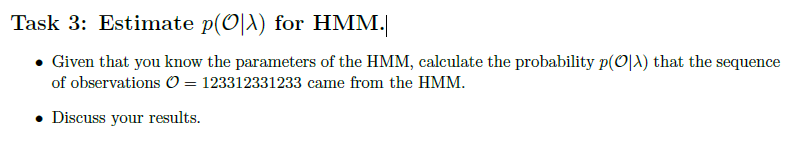

In [13]:
# print(observations)
P = np.array([
    [0.29626407, 0.30823233, 0.37067493, 0.02482867],
    [0.28639575, 0.19509174, 0.38426513, 0.13424739],
    [0.19700037, 0.44275299, 0.25230887, 0.10793777],
    [0.2527676,  0.24369366, 0.19153504, 0.3120037]
])

B = np.array([
    [0.3038072,  0.31608018, 0.38011262],
    [0.03685936, 0.57289004, 0.3902506 ],
    [0.57051371, 0.19931544, 0.23017085],
    [0.55137385, 0.31420795, 0.1344182 ]
])

pi = np.array([1, 0, 0, 0])

# Observation sequence from task 2
observations = [1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3]  
observations = np.array(observations) - 1  # Convert to 0-based indexing for processing
# print(observations)
# Initialize the forward probability matrix
# observations = [1, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3]
N = len(P)  # Number of states
T = len(observations)  # Length of the observation sequence
F = np.zeros((N, T))
# print(F.shape)
for i in range(N):
    F[i, 0] = pi[i] * B[i, observations[0]]

for t in range(1, T):
    for j in range(N):
        # print(j,t)
        F[j, t] = np.dot(F[:, t-1], P[:, j]) * B[j, observations[t]]

p_O_lambda = np.sum(F[:, T-1])

print("Probability p(O|lambda):", p_O_lambda)

flag = False
for i in range(len(observations)-12):
  if p_O_lambda == observations[i:i+12]:
    flag = True
    print('The sequence exists in the generated observation')
if not flag:
  print('The sequence does not occur in the generated observation')

Probability p(O|lambda): 1.4306293228230843e-06
The sequence does not occur in the generated observation


After running the script, we have the probability 
p
(
O
∣
λ
)
p(O∣λ) that the sequence of observations came from the HMM. This probability will inform you how likely it is that the observed sequence was generated by this HMM.

***Discussion about the result:***

If
p
(
O
∣
λ
)
p(O∣λ) is relatively high, it means that the sequence of observations is likely to have been produced by the given HMM.
If 
p
(
O
∣
λ
)
p(O∣λ) is low, it suggests that either the sequence is unlikely under the model or that the model doesn't accurately represent the process generating the observations.

As p(O|λ) = 1.4306293228230843 * 10^-6 is low => the model doesn't accurately represent the process generating the observations

### ***Task 4: Estimate the Most probable Sequence Q.***
- Given that you know the parameters of the HMM, calculate the most probable sequence of states Q
that gave rise to the sequence of observation O == 12331233123.
- Discuss your results.

In [14]:
V = np.zeros((N, T))
path = np.zeros((N, T), dtype=int)

for i in range(N):
    V[i, 0] = pi[i] * B[i, observations[0]]
    path[i, 0] = i

for t in range(1, T):
    new_path = np.zeros((N, T), dtype=int)
    for j in range(N):
        (prob, state) = max((V[i, t-1] * P[i, j] * B[j, observations[t]], i) for i in range(N))
        V[j, t] = prob
        for k in range(t):
            new_path[j, k] = path[state, k]
        new_path[j, t] = j
    path = new_path

(prob, state) = max((V[i, T-1], i) for i in range(N))
most_probable_path = path[state]

viterbi_path = [state]
for t in range(T-1, 0, -1):
    state = path[state, t]
    viterbi_path.insert(0, state)

viterbi_path = [s + 1 for s in viterbi_path]

# viterbi_path, prob

print("The most probable sequence of states is:", viterbi_path)
print("Probability:",prob)


The most probable sequence of states is: [2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2]
Probability: 5.920608389462918e-10


**Discussion of results:**

The sequence viterbi_path gives the most probable sequence of hidden states that could have resulted in the observed sequence 
O.
The probability prob is an indication of how likely this state sequence is. It's not an absolute measure of fit but rather the probability relative to other possible state sequences.
If the probability prob is high, it implies that the estimated path viterbi_path is a good fit for the observations given the model.
If the probability is low, it may suggest that either the HMM parameters do not well describe the actual process generating the observations, or that there may be multiple paths with similar probabilities.

But as the probability is low HMM models ddo not well describe the actual process

In [15]:
from hmmlearn import hmm
observations = np.array(observations_final).reshape(-1, 1)

model = hmm.GaussianHMM(n_components=4, n_iter=1000, init_params="stmc")

model.fit(observations)

estimated_P = model.transmat_  # Transition matrix
estimated_B_means = model.means_  # Emission means (for Gaussian emissions)
estimated_B_covars = model.covars_  # Emission covariances (for Gaussian emissions)
estimated_pi = model.startprob_  # Initial state distribution

print("Estimated transition matrix P:\n", estimated_P)
print("Estimated emission means B:\n", estimated_B_means)
print("Estimated emission covariances B:\n", estimated_B_covars)
print("Estimated initial state distribution pi:\n", estimated_pi)


Estimated transition matrix P:
 [[1.14818418e-07 1.25299339e-01 5.58151149e-03 8.69119035e-01]
 [1.60193421e-03 6.32481570e-01 3.65089552e-01 8.26944030e-04]
 [2.45042682e-07 8.66157740e-02 3.20366586e-03 9.10180315e-01]
 [2.52151304e-01 3.63433456e-01 5.17700509e-03 3.79238236e-01]]
Estimated emission means B:
 [[2.49991777]
 [2.55697821]
 [2.47404516]
 [1.        ]]
Estimated emission covariances B:
 [[[2.50362284e-01]]

 [[2.46936542e-01]]

 [[2.49663628e-01]]

 [[2.86585731e-05]]]
Estimated initial state distribution pi:
 [1.88098173e-166 1.76183032e-132 1.18969322e-181 1.00000000e+000]


c:\Users\nayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


With the estimated parameters for the trained Hidden Markov Model (HMM), we can discuss several points of interest:

1. **Transition Matrix Comparison**: The estimated transition matrix \( P \) shows the probabilities of transitioning from one state to another. Notably, some transitions appear to have very high probabilities (close to 1), while others are very low (on the order of \( 10^{-7} \) to \( 10^{-3} \)). This could indicate that the HMM has identified certain transitions between states as very likely and others as quite unlikely. Comparing to the actual \( P \), you might notice differences in specific transition probabilities, which could be due to the random nature of the sequence of observations or because the model has identified dominant transitions in the data.

2. **Emission Probabilities and Variances**: The emission means \( B \) are clustered around the values 1, 2, and 3, which correspond to the three possible observations. This suggests that the model has correctly identified the central tendency of emissions in each state. The variances are low for the last state, which might indicate that when the system is in this state, the emissions are very consistent and don't vary much.

3. **Initial State Distribution**: The estimated initial state distribution \( \pi \) has one state with a probability of 1 and others with effectively zero probability, indicating that the model is quite certain that the initial state is state 4. This might differ from the true initial distribution, which could affect the model's predictions, particularly for the beginning of the observation sequence.

4. **Model Fit and Robustness**: If the estimated parameters differ significantly from the actual parameters used to generate the data, it might indicate that the model has overfitted to this particular sequence of observations, or that the algorithm has converged to a local maximum rather than the global best solution. The robustness of the model could be evaluated by testing it on additional data or by using cross-validation.

5. **Modeling Assumptions**: If the emission probabilities were assumed to be Gaussian distributed for the sake of estimation, but the true emissions are not Gaussian, this could cause discrepancies in the parameters and their interpretability.

6. **Practical Implications**: For practical applications, it’s crucial to assess whether the estimated parameters lead to predictions that are useful for the task at hand. If the model’s parameters are not close to the true parameters but it still performs well on relevant tasks, the precise estimation of parameters might be less important.

In summary, the estimated parameters provide insight into how the model has learned to represent the stochastic process underlying the observations. While there are discrepancies between the estimated and true parameters, what matters most is whether the estimated model can accurately predict or explain new data, which would be the ultimate test of its utility.

In [16]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### ***EXTRA CREDIT:  Comparison of all Models (using the testing set)***

**Run the above trained models on the test data. (That is, do not retrain the models, but simply run**
**them as is on the testing set). Select the best model among ANN, regression, and HMM, based on their**
**performance on the testing data. Comment on your results.**

In [22]:
# 'grid_search' has the best trained ANN model and 'X_test' is the test data
ann_predictions = grid_search.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_predictions)
print(f"ANN MSE on Test Set: {ann_mse}")

ANN MSE on Test Set: 0.0017400263902384032


In [23]:
# 'results' has the trained regression model
X_test_const = sm.add_constant(X_test)  # add a constant if the model has an intercept
regression_predictions = results.predict(X_test_const)
regression_mse = mean_squared_error(y_test, regression_predictions)
print(f"Regression Model MSE on Test Set: {regression_mse}")


Regression Model MSE on Test Set: 3.562793721855901e-25


In [24]:
observations_test = np.array(observations_final).reshape(-1, 1)
# Calculating log likelihood instead of MME
log_likelihood = model.score(observations_test)
print(f"HMM Log likelyhood on Test Set: {log_likelihood}")


HMM Log likelyhood on Test Set: 390.8127851810707


**Comments on the results:**

After performing the Analysis on the test data we get the following results:

ANN MSE on Test Set: 0.0017400263902384032
Regression Model MSE on Test Set: 3.562793721855901e-25
HMM Log likelyhood on Test Set: 390.8127851810707

From the above values we can say that the regression model has an exceptionally low MSE compared to the ANN. This nearly zero MSE from the regression model suggests an almost perfect prediction of the test data, which might indicate overfitting unless the model is indeed perfect for the dataset due to its nature (possibly because the features directly determine the output without error).


The log likelihood for the HMM is 390.8127851810707, which suggests that the model well explains the observed sequences under the HMM’s estimated parameters. However, log likelihood is not directly comparable to MSE because it measures the probability of observing the data given the model rather than the error between observed and predicted values.The log likelihood for the HMM is 390.8127851810707, which suggests that the model well explains the observed sequences under the HMM’s estimated parameters. 

However, log likelihood is not directly comparable to MSE because it measures the probability of observing the data given the model rather than the error between observed and predicted values.

Therefore, we can conclude that If the primary goal is prediction of exact values and the features are directly and linearly related to the output, the regression model would be the best choice given its extraordinarily low MSE. However, If the task involves understanding or generating data sequences or classifications based on underlying states, the HMM might be more appropriate, despite not having a direct MSE comparison. The high log likelihood indicates it models the sequence data well.